<a href="https://colab.research.google.com/github/Tilak-Shenoy/IE517/blob/main/IE517_F20_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
# Upload file from the system. We are using Treasury Squeeze dataset in this case
from google.colab import files
data_to_load = files.upload()

Saving Treasury Squeeze raw score data.csv to Treasury Squeeze raw score data.csv


In [36]:
#Save the data into a dataframe
df = pd.read_csv('Treasury Squeeze raw score data.csv')

In [37]:
df.head()

,rowindex,contract,price_crossing,price_distortion,roll_start,roll_heart,near_minus_next,ctd_last_first,ctd1_percent,delivery_cost,delivery_ratio,squeeze
0,1,TUZ92 Comdty,0.157659,0.900783,0.016053,1.000000,1.000000,0.902811,1.000000,0.010743,0.099313,True
1,2,TUH93 Comdty,0.018588,1.000000,1.000000,0.084724,0.778847,1.000000,0.136069,0.154116,1.000000,False
2,3,TUM93 Comdty,0.035755,0.045987,0.673543,1.000000,0.027689,0.067889,0.007696,0.034743,0.171676,False
3,4,TUU93 Comdty,0.663832,1.000000,0.063057,0.188899,0.064454,0.005742,0.166102,0.956668,1.000000,True
4,5,TUZ93 Comdty,0.109678,0.113601,0.726244,1.000000,1.000000,1.000000,1.000000,0.105467,0.145025,False


In [38]:
#Slicing the dataframe to form X and y
X = df.iloc[:,2:11]
y = df.iloc[:,-1:]

In [39]:
# Splitting the data into training and test set with 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33, stratify=y)

In [40]:
X_train.shape

(720, 9)

In [43]:
# Run KNN with different values of K. 
# Assuming that we find the optimal value of K as the sqrt(train_size) we run it until the value of k is sqrt(train_size) + 10
accuracy = []
for k in range(5, 720, 5):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracy.append(accuracy_score(y_pred, y_test))

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

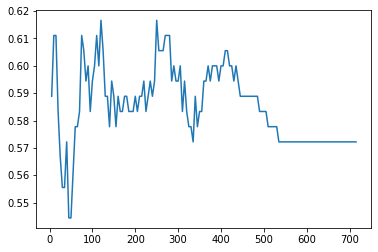

In [45]:
#Plotting the graph of value of k vs accuracy
k_values = list(range(5, 720, 5))
plt.plot(k_values, accuracy)
plt.show()

Looking at the graph, it's clear that the optimal value is within 100. Next, we zoom into the graph to find a better result

In [56]:
# Filter first 20 accuracy (k < 100)
accuracy100 = accuracy[:20]
k = list(range(0,100,5))

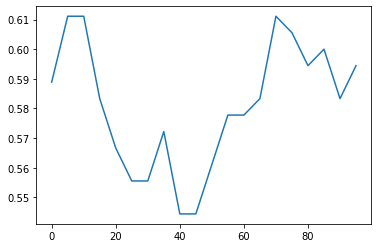

In [58]:
plt.plot(k,accuracy100)

In [59]:
print("My name is Tilak Shenoy")
print("My NetID is: tshenoy2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Tilak Shenoy
My NetID is: tshenoy2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
